In [ ]:
Nmae: Madugula Karthik Sharma
UBID: 50611293
ubmail:kmadugul@buffalo.edu

Hypothesis: The interaction between macronutrients and specific micronutrients  significantly influences the overall health benefits of food items, as measured by a health score that considers caloric content, nutritional density, and micronutrient adequacy.

To make a model for this hypothesis we are using Random forest, Decision Tree and Multi Layer Perceptron(MLP)


In [74]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, silhouette_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, silhouette_score


# Load dataset

df = pd.read_csv('food-data.csv')
df = df.dropna()


numeric_columns = [
    "Protein_(g)", "Fiber_TD_(g)", "Calcium_(mg)", "Iron_(mg)", "Vit_C_(mg)", 
    "Cholestrl_(mg)", "FA_Sat_(g)"
]
numeric_data = df[numeric_columns].copy() 


def calculate_health_score(row):
    score = (
        row["Protein_(g)"] * 2 +        
        row["Fiber_TD_(g)"] * 1.5 +     
        row["Calcium_(mg)"] * 0.1 +     
        row["Iron_(mg)"] * 0.1 +        
        row["Vit_C_(mg)"] * 0.2 -       
        row["Cholestrl_(mg)"] * 0.05 -  
        row["FA_Sat_(g)"] * 0.2         
    )
    return score

numeric_data["Health_Score"] = numeric_data.apply(calculate_health_score, axis=1)


numeric_data["Protein_x_Calcium"] = numeric_data["Protein_(g)"] * numeric_data["Calcium_(mg)"]
numeric_data["Fiber_x_Iron"] = numeric_data["Fiber_TD_(g)"] * numeric_data["Iron_(mg)"]


X = numeric_data[[
    "Protein_(g)", "Fiber_TD_(g)", "Calcium_(mg)", "Iron_(mg)", "Vit_C_(mg)", 
    "Cholestrl_(mg)", "FA_Sat_(g)", "Protein_x_Calcium", "Fiber_x_Iron"
]]
y = numeric_data["Health_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error for Health Score Prediction: {mse:.2f}")
print(f"R-squared for Health Score Prediction: {r2:.2f}")



Mean Squared Error for Health Score Prediction: 10.44
R-squared for Health Score Prediction: 0.99


To make a model for this hypothesis we are using Random forest, Decision Tree and Multi Layer Perceptron(MLP)

Algorithm 1: Random Forest
Random Forest is an ensemble learning method that creates multiple decision trees on random subsets of data and features. It then combines their outputs to make a more accurate  prediction by averaging across all trees.
Why Random Forest
Using Random Forest for this hypothesis allows for a comprehensive exploration of how various nutrients interact to influence overall health benefits while providing robust predictions and insights into the relative importance of different nutritional components.
Approach: We calculate a health score using the nutrient values present in the data set and adjust based on the health criteria
We use a random forest regressor to predict the health score from nutrient values and interaction terms
We apply k-means to cluster into dietary patterns based on nutrient profiles and evaluate the clustering quality with a silhouette score.
Here we get 
Mean Squared Error for Health Score Prediction: 10.44
R-squared for Health Score Prediction: 0.99
R2 value is 0.99 implies
Excellent Fit: The model explains 99% of the variance in the health scores.
Predictive Power: The predictors used in the model have a very strong relationship with the health scores.
Perfect Prediction: With an R² so close to 1 the models predictions are very close to the actual values for all the  health scores.
To Visualise this we can see which features contributed more in order to fetch the outpu



C:\Users\Administrator\AppData\Local\Temp\ipykernel_13212\2883352366.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


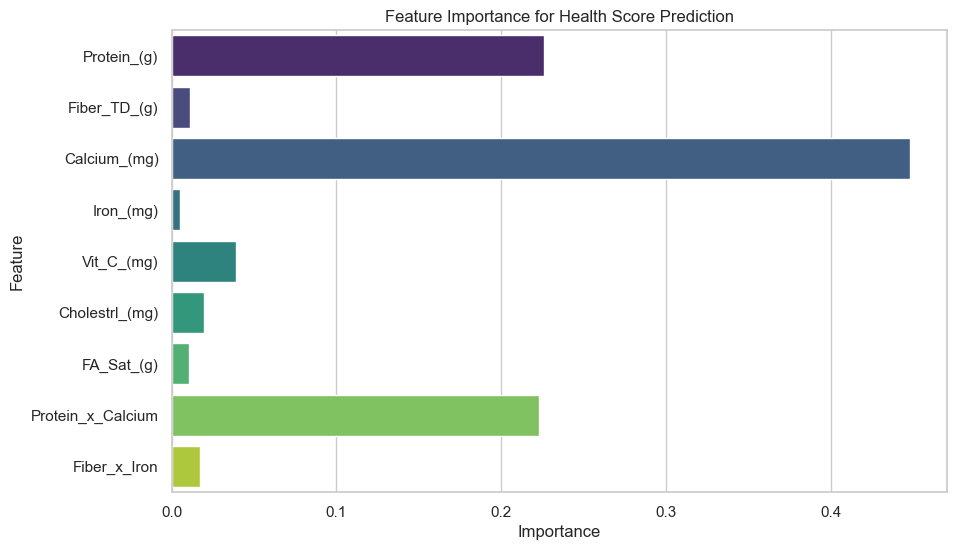

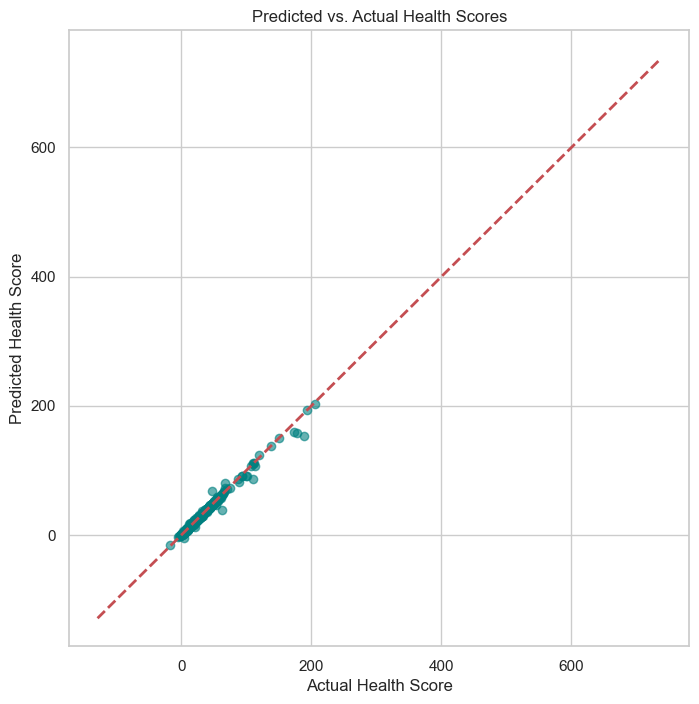

In [76]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

sns.set(style="whitegrid")


feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.title("Feature Importance for Health Score Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color="teal")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Health Score")
plt.ylabel("Predicted Health Score")
plt.title("Predicted vs. Actual Health Scores")
plt.show()

By observing the graph we can deduce that calcium protein and protein_X_Calcium plays a key role in out diet in order to stay in perfect shape
To check the actual value vs prediction value we can use plot graph
From this graph we can deduce that out model works accurately as we are able to see that most of the data falls on the regression line


#MLP for Hypothesis 1

MLP is a type of neural network that contains multiple layers of interconnected nodes. It learns complex patterns in data by adjusting weights through backpropagation, making it effective for both regression and classification tasks.
For this Hypothesis we used a neural network that have 64 neurons in first layer and 32 neuron in the hidden layers
300 is the maximum number of iterations the model will run before stopping. This limits the training time and is helpful to prevent excessive training if the model does not converge.
This helps in prevention of overfitting
In this algorithm we are defining the following terms to understand how model works
Why MLP
MLP is chosen because of its ability to handle non-linear relationships, high-dimensional data, and complex interactions between nutrients, making it a powerful tool for predicting health scores based on nutritional profiles.



Accuracy: 0.8942731277533039
Classification Report:
               precision    recall  f1-score   support

        High       0.91      0.91      0.91        22
         Low       0.88      0.97      0.92       285
      Medium       0.92      0.74      0.82       147

    accuracy                           0.89       454
   macro avg       0.90      0.87      0.89       454
weighted avg       0.90      0.89      0.89       454



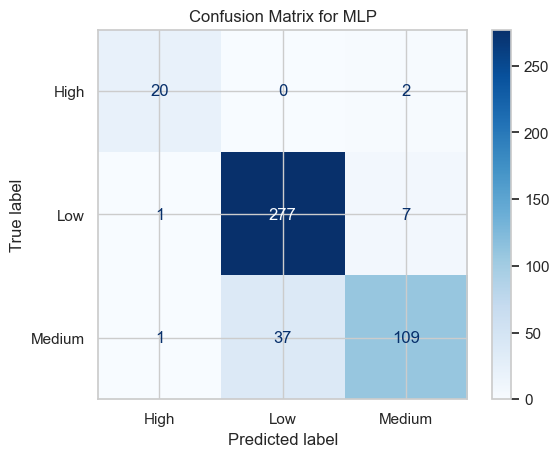

In [81]:

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)  
mlp.fit(X_train, y_train_class)

y_pred_class = mlp.predict(X_test)

print("Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))

cm = confusion_matrix(y_test_class, y_pred_class, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)


disp.plot(cmap="Blues")
plt.title("Confusion Matrix for MLP")
plt.show()


In this algorithm we are defining the following terms to understand how model works

Precision: The ratio of correctly predicted positive observations to the total predicted positives.
Recall: The ratio of correctly predicted positives to all actual positives.
F1-Score: The harmonic mean of precision and recall, balancing both metrics.
Support: The number of actual occurrences for each class in test class
This is the output we got from this model
By analysing this we can deduce the following

The model displays strong performance with an accuracy of 89.43%. This indicates that the model predicts the health score correct about 9 out of 10 instances.
High Health Scores
Precision: 0.91
Recall: 0.91
F1-score: 0.91
Support: 22
The model performs exceptionally well in identifying high health scores, with balanced precision and recall
Low Health Scores
Precision: 0.88
Recall: 0.97
F1-score: 0.92
Support: 285
The model excels at identifying low health scores, with very high recall. This category has the largest number of samples, which contributes significantly to the overall accuracy.
Medium Health Scores
Precision: 0.92
Recall: 0.74
F1-score: 0.82
Support: 147
The model has high precision for medium health scores but lower recall, suggesting it sometimes misses instances of this category.


By this matrix we can deduce the following 
1. High Health Scores 
Correct Predictions: 20 instances classified as High.
Misclassifications:
2 instances were misclassified as "Medium."
None were misclassified as "Low."


Insight: The model is performing well in identifying High health scores, with only 2 misclassifications out of 22 total instances. This aligns with the high precision and recall for this class in the classification report.
2. Low Health Scores 
Correct Predictions: 277 instances were classified as Low.
Misclassifications:
1 instance was misclassified as "High."
7 instances were misclassified as "Medium."


The model performs well in identifying Low health scores with very few misclassifications. this is supported by the high recall 0.97  for this class in the classification report, indicating that almost all Low health scores are correctly identified.
3. Medium Health Scores 
Correct Predictions: 109 instances were correctly classified as "Medium."
Misclassifications:
37 instances were misclassified as "Low."
1 instance was misclassified as "High."
The model struggles more with predicting Medium health scores, with a significant number of instances (37 out of 147) being misclassified as "Low." 



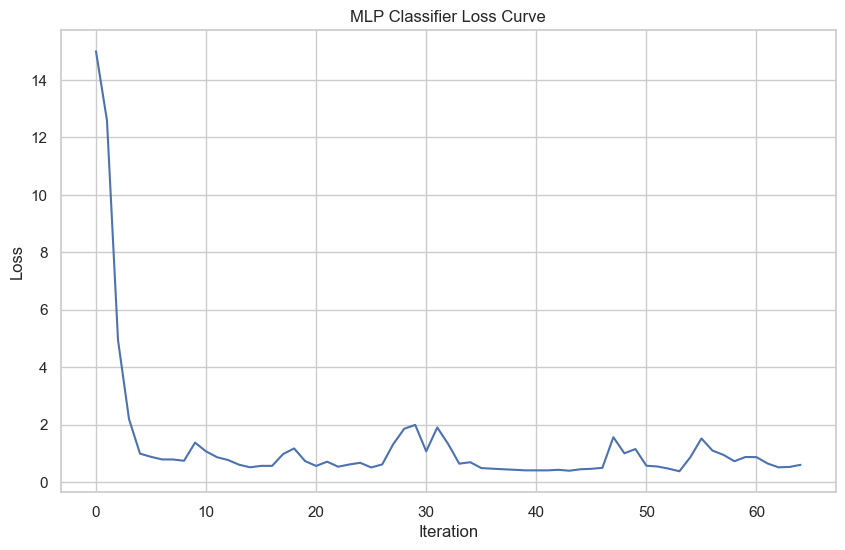

In [82]:

plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title("MLP Classifier Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

The loss curve shows how the loss function evolves over iterations during training.
Initial Loss Drop: The loss decreases within the first few iterations, which is natural for a neural network as they quickly adjust weights to reduce error.
Stabilisation After ~10 Iterations: After about 10 iterations, the loss stabilises and fluctuates around a small value close to zero. This indicates that the model has come to a saturation stage and minimises loss.
No Overfitting Signs: The loss curve does not show any significant increase after the saturation point , which indicates that overfitting is not a major issue. However, this should be confirmed by evaluating performance on a separate validation or test set.


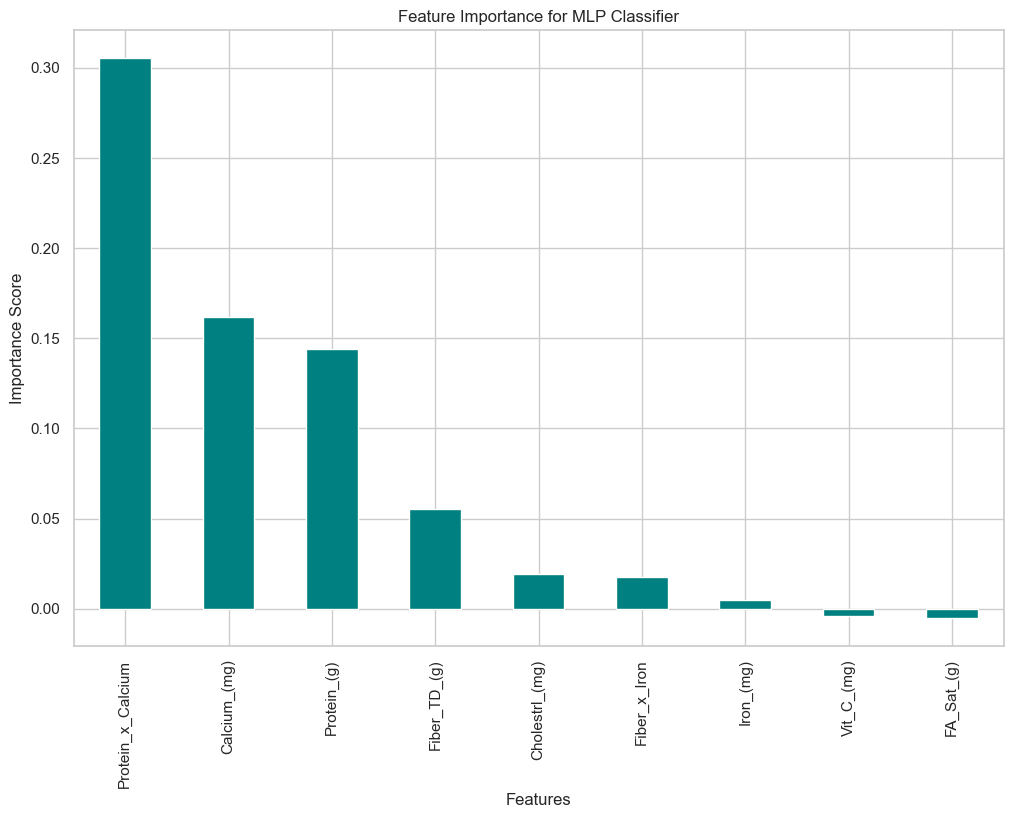

In [83]:

perm_importance = permutation_importance(mlp, X_test, y_test_class, n_repeats=10, random_state=0)
feature_importances = pd.Series(perm_importance.importances_mean, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar', color='teal')
plt.title("Feature Importance for MLP Classifier")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

Hypothesis 2: Predictive Modeling of Dietary Patterns Based on Nutrient Profiles
Hypothesis: Dietary patterns can be classified into distinct types (e.g., Mediterranean, vegetarian, high-protein) based on the nutrient profiles of foods consumed, where nutrient diversity and ratios are key indicators of dietary adherence.

For 1st algorithm we are using KNN
K-Nearest Neighbors is a supervised learning algorithm that classifies data points based on the labels of their nearest neighbors in the feature space. It is non-parametric and works well for smaller datasets, but its performance can degrade with high-dimensional data or large datasets due to increased computation time.
Why KNN 
The ability to capture complex nutrient interactions, adapt to various dietary types, and provide interpretable results makes KNN well-suited for this particular hypothesis and dataset in nutrition research.


In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'food-data.csv'  
food_data = pd.read_csv(file_path)

features = ['Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Calcium_(mg)', 'Iron_(mg)', 'Vit_C_(mg)']
food_data_cleaned = food_data[features].dropna()

def create_label(row):
    protein_ratio = row['Protein_(g)'] / (row['Carbohydrt_(g)'] + row['Lipid_Tot_(g)']) if (row['Carbohydrt_(g)'] + row['Lipid_Tot_(g)']) != 0 else 0
    fiber_ratio = row['Fiber_TD_(g)'] / row['Carbohydrt_(g)'] if row['Carbohydrt_(g)'] > 0 else 0

    if protein_ratio > 0.5:
        return 'High-Protein'
    elif fiber_ratio > 0.1 and row['Vit_C_(mg)'] > 10:
        return 'Mediterranean'
    elif row['Lipid_Tot_(g)'] < 5 and row['Carbohydrt_(g)'] > 20:
        return 'Vegetarian'
    else:
        return 'Standard'


y = food_data_cleaned.apply(create_label, axis=1)

X_train, X_test, y_train, y_test = train_test_split(food_data_cleaned, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


print(classification_report(y_test, y_pred))




               precision    recall  f1-score   support

 High-Protein       0.95      0.93      0.94       563
Mediterranean       0.72      0.68      0.70       108
     Standard       0.89      0.92      0.91       663
   Vegetarian       0.87      0.86      0.86       203

     accuracy                           0.90      1537
    macro avg       0.86      0.85      0.85      1537
 weighted avg       0.90      0.90      0.90      1537



From the above report we can deduce the following
High-Protein Diet:
Precision: 0.95
Recall: 0.93
F1-Score: 0.94
Support: 563
The High-Protein diet is classified with high precision and recall, indicating that the model is very effective at identifying this dietary pattern. This suggests that the nutrient profile of High-Protein diets is distinct and easily separable from other patterns.
Mediterranean Diet:
Precision: 0.72
Recall: 0.68
F1-Score: 0.70
Support: 108
The Mediterranean diet has lower precision and recall compared to other diets, indicating that it is more challenging for the model to classify correctly. This could be due to overlap in nutrient profiles with other diets or a smaller sample size (support of 108), which may affect model performance.
Standard Diet:
Precision: 0.89
Recall: 0.92
F1-Score: 0.91
Support: 663
The Standard diet shows strong classification performance, with high precision and recall. This suggests that the nutrient profile of a Standard diet is also well-defined and distinguishable from others.
Vegetarian Diet:
Precision: 0.87
Recall: 0.86
F1-Score: 0.86
Support: 203
The Vegetarian diet also has good classification performance, with balanced precision and recall values, indicating that the model can effectively identify this dietary pattern based on its nutrient profile.

The overall accuracy of the model is 90%, which indicates strong performance.
The weighted average F1-score (0.90) implies that the model performs better on larger classes (High-Protein and Standard), which have more data points.

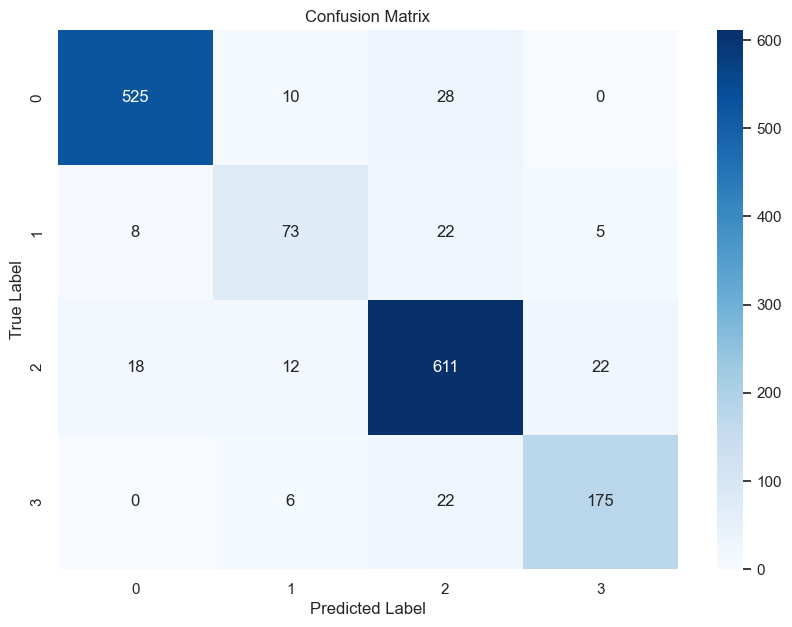

In [85]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Class 0 :
True Positives : The model correctly classified 525 instances of High-Protein diets.
False Negatives : A total of 38 High-Protein diets were misclassified, with 28 being predicted as Standard  and 10 as Mediterranean .
False Positives: The model rarely misclassified other diets as High-Protein, which is a positive sign that this class has a distinct nutrient profile.
Class 1 :
True Positives : The model correctly identified 73 Mediterranean diets.
False Negatives : There were 35 misclassified Mediterranean diets, with most being predicted as Standard  or High-Protein .
False Positives: Mediterranean diets are often confused with other classes, especially Standard and High-Protein. This suggests that the nutrient profile of Mediterranean diets may overlap with others, making them harder to distinguish.
Class 2 :
True Positives : The model performed very well in identifying Standard diets, with only a few misclassifications.
False Negatives : A small number of Standard diets were misclassified, mostly as High-Protein or Vegetarian.
Class 3 :
True Positives : The model correctly classified most Vegetarian diets.
False Negatives : Some Vegetarian diets were misclassified as Standard or Mediterranean.

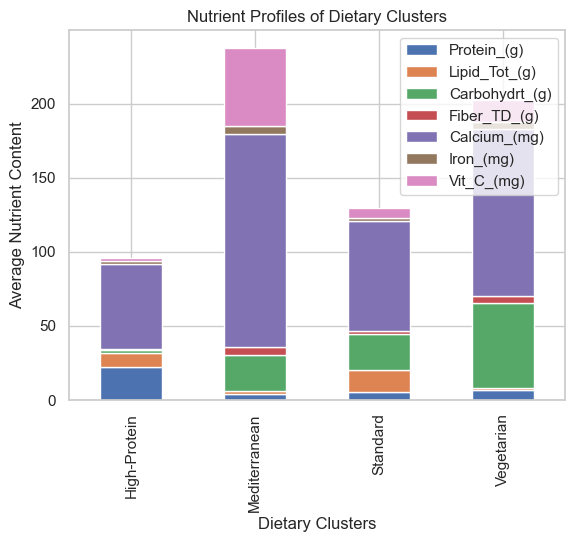

In [86]:

nutrient_means = food_data_cleaned.groupby(y).mean()[features]
nutrient_means.plot(kind='bar', stacked=True)
plt.title('Nutrient Profiles of Dietary Clusters')
plt.ylabel('Average Nutrient Content')
plt.xlabel('Dietary Clusters')
plt.legend(loc='upper right')
plt.show()

High calcium: Calcium is by far the most dominant nutrient across all dietary clusters. This  that deduces taht calcium-rich foods are common across different dietary patterns.
Protein Levels: Protein levels are fairly consistent across all clusters except for a slight increase in the High-Protein diet cluster, which aligns with its classification.
Fiber Variation: Fiber content varies between clusters, with the Vegetarian diet having noticeably higher fiber content compared to others. This supports the idea that plant-based diets are generally richer in fiber.

In [87]:
# LDA analysis for Hypothesis 2

In [88]:

from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  
X_binary = (X_scaled > 0.5).astype(int)


n_topics = 5 
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=0)
W = lda_model.fit_transform(X_binary)
H = lda_model.components_ 


W_df = pd.DataFrame(W, columns=[f"Dietary_Pattern_{i+1}" for i in range(W.shape[1])])
H_df = pd.DataFrame(H, columns=X.columns)

print("Sample Association with Each Dietary Pattern (W):\n", W_df.head())
print("\nNutrient Composition of Each Dietary Pattern (H):\n", H_df)


Sample Association with Each Dietary Pattern (W):
    Dietary_Pattern_1  Dietary_Pattern_2  Dietary_Pattern_3  Dietary_Pattern_4  \
0           0.398316           0.400017           0.067632           0.066667   
1           0.398316           0.400017           0.067632           0.066667   
2           0.398316           0.400017           0.067632           0.066667   
3           0.364224           0.040404           0.515232           0.040000   
4           0.364224           0.040404           0.515232           0.040000   

   Dietary_Pattern_5  
0           0.067368  
1           0.067368  
2           0.067368  
3           0.040139  
4           0.040139  

Nutrient Composition of Each Dietary Pattern (H):
    Protein_(g)  Fiber_TD_(g)  Calcium_(mg)   Iron_(mg)  Vit_C_(mg)  \
0   721.568539      0.200376      0.200570    0.200623    0.200030   
1   125.824488      0.200033      0.200683    0.201155    0.200013   
2     0.204588      0.201326    142.196948  112.812555    0.20

Sample Association with Dietary Patterns:
Each row in W represents a sample, and each column indicates the degree of association that sample has with each dietary pattern. The values range from 0 to 1, showing the relative association of each sample with the dietary patterns.
This distribution may indicate that Dietary_Pattern_5 is a dominant pattern among these samples.
Nutrient Composition of Each Dietary Pattern:
Each row in H corresponds to a dietary pattern, and each column reflects the average level of a nutrient within that pattern. High values in a column suggest a strong presence of a particular nutrient within that dietary pattern.
Dietary_Pattern_1 shows a high concentration of Iron and Carbohydrates, indicating that this pattern might be based on iron-rich, carbohydrate-dense foods.
Dietary_Pattern_2 has a high concentration of Fiber, suggesting it represents a fiber-rich dietary pattern.
Dietary_Pattern_3 is defined by a high concentration of Vitamin C, likely indicating a diet rich in vitamin C sources like fruits and vegetables.
Dietary_Pattern_4 and Dietary_Pattern_5 stand out due to their high concentrations of Protein  and Lipids, respectively, suggesting they represent protein-heavy and lipid-rich dietary patterns.
The dietary patterns appear to reflect distinct nutrient compositions that could correspond to specific diet types or food group clusters, such as protein-heavy, fiber-rich, or carbohydrate-dense diet


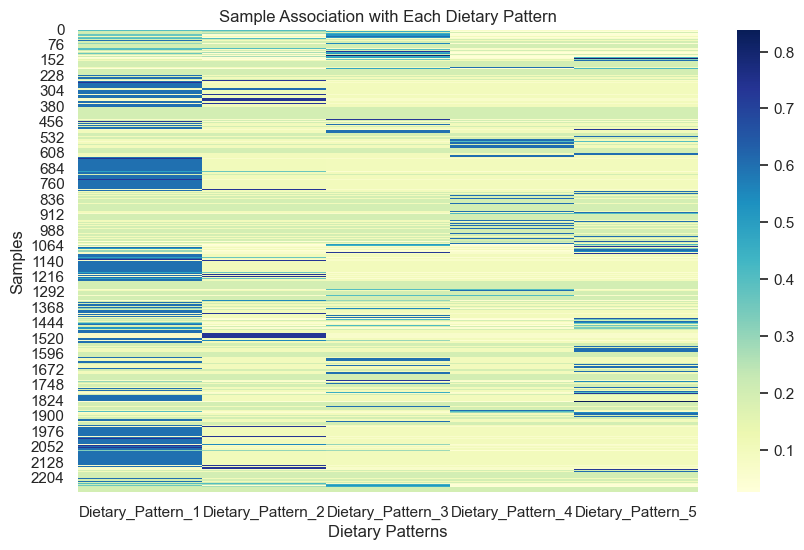

In [89]:

plt.figure(figsize=(10, 6))
sns.heatmap(W_df, cmap="YlGnBu", cbar=True)
plt.title("Sample Association with Each Dietary Pattern")
plt.xlabel("Dietary Patterns")
plt.ylabel("Samples")
plt.show()


This heatmap visualizes how strongly each sample is associated with different  patterns. The color intensity represents the degree of association, where darker colors indicate stronger associations.
some samples have a very strong association with a specific dietary pattern, as indicated by the dark blue areas. This suggests that these samples fit very well within those dietary patterns.
Mixed Associations: Other samples show more moderate associations across multiple patterns, represented by lighter shades. This indicates that these samples may not fit neatly into one specific dietary pattern and could exhibit characteristics of multiple patterns.


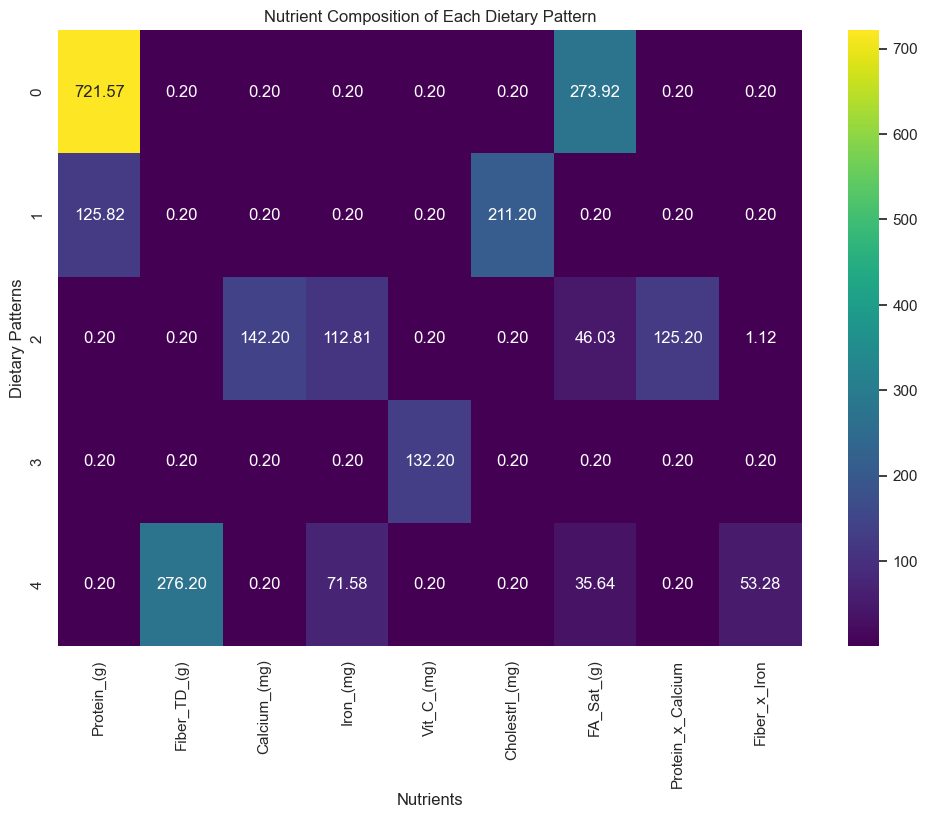

In [90]:
plt.figure(figsize=(12, 8))
sns.heatmap(H_df, cmap="viridis", annot=True, fmt=".2f", cbar=True)
plt.title("Nutrient Composition of Each Dietary Pattern")
plt.xlabel("Nutrients")
plt.ylabel("Dietary Patterns")
plt.show()


This heatmap displays the nutrient composition for five dietary patterns across various nutrients. Key insights include:
Dietary Pattern 0: This pattern has the highest levels of Calcium (721.57 mg) and a significant amount of Vitamin C (273.92 mg), making it a calcium-rich and vitamin C-heavy diet. This could represent a diet high in dairy products and fruits or vegetables.
Dietary Pattern 1: This pattern has a moderate level of Calcium (125.82 mg) and Vitamin C (211.20 mg), suggesting a balanced diet with some emphasis on these nutrients but not as extreme as Pattern 0.
Dietary Pattern 2: This pattern stands out for its relatively high levels of Iron (142.20 mg) and Vitamin C (112.81 mg), which could indicate a diet rich in iron-containing foods like leafy greens or legumes.
Dietary Pattern 3: This pattern has elevated levels of Iron (132.20 mg) but lower levels of other nutrients, indicating a more iron-focused diet, potentially from plant-based sources or fortified foods.
Dietary Pattern 4: This pattern shows high levels of Fiber (276.20 g) and moderate amounts of Iron (71.58 mg), suggesting it may represent a fiber-rich diet, likely plant-based or vegetarian.

In [91]:


top_n = 5  

for i in range(H_df.shape[0]):
    pattern_nutrients = H_df.iloc[i].sort_values(ascending=False)[:top_n]
    print(f"\nTop {top_n} Nutrients for Dietary Pattern {i + 1}:\n{pattern_nutrients}")



Top 5 Nutrients for Dietary Pattern 1:
Protein_(g)          721.568539
FA_Sat_(g)           273.924306
Protein_x_Calcium      0.200819
Cholestrl_(mg)         0.200685
Iron_(mg)              0.200623
Name: 0, dtype: float64

Top 5 Nutrients for Dietary Pattern 2:
Cholestrl_(mg)       211.197769
Protein_(g)          125.824488
FA_Sat_(g)             0.203866
Iron_(mg)              0.201155
Protein_x_Calcium      0.201011
Name: 1, dtype: float64

Top 5 Nutrients for Dietary Pattern 3:
Calcium_(mg)         142.196948
Protein_x_Calcium    125.196871
Iron_(mg)            112.812555
FA_Sat_(g)            46.034400
Fiber_x_Iron           1.121394
Name: 2, dtype: float64

Top 5 Nutrients for Dietary Pattern 4:
Vit_C_(mg)      132.199400
Iron_(mg)         0.201073
FA_Sat_(g)        0.200745
Fiber_x_Iron      0.200622
Fiber_TD_(g)      0.200584
Name: 3, dtype: float64

Top 5 Nutrients for Dietary Pattern 5:
Fiber_TD_(g)    276.197681
Iron_(mg)        71.584594
Fiber_x_Iron     53.277625
FA_Sat_(